# Trial Duration EDA – Numeric & Categorical vs Target

This notebook loads the feature table and explores how each feature
relates to trial **duration** (in years). It produces:
- **Scatter + robust trendline (Huber)** for **numeric** predictors
- **Box + strip plots** for **categorical** predictors  
All figures are saved under `./figures/` as `.jpg`.

19 numeric predictors : # patients, country_n, site_n, assessments_n, primary_out_n, secondary_out_n, other_out_n, start_date, patients_per_site, num_arms, active_prob, elig_crit_n, age_min, age_max, age_range, freq_in_window, novelty_score, complexity_score_100, attractiveness_score_100
18 categorical predictors: phase, sponsor_class, condition_top, therapeutic_area, intervention_type, assessments_complexity, global_trial, masking_level, population_class, cohort_design, study_type, allocation, masking_flag, placebo_flag, safety_cuts_flag, randomized_flag, fda_drug_flag, fda_device_flag

Saved: figures/# patients_vs_duration_years.jpg


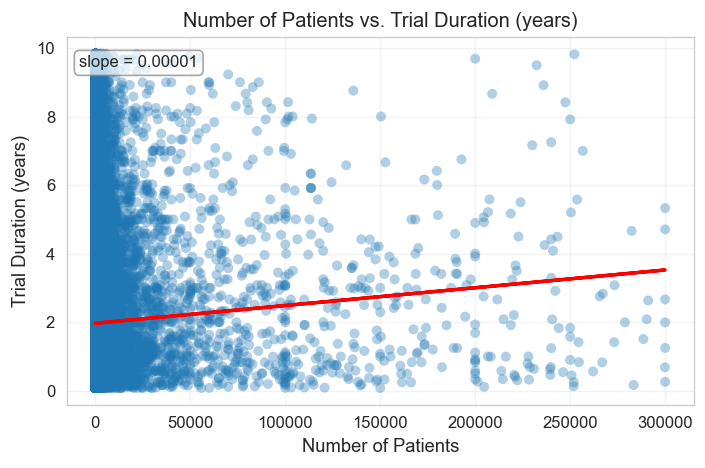

[01/19] Plotted numeric # patients
Saved: figures/country_n_vs_duration_years.jpg


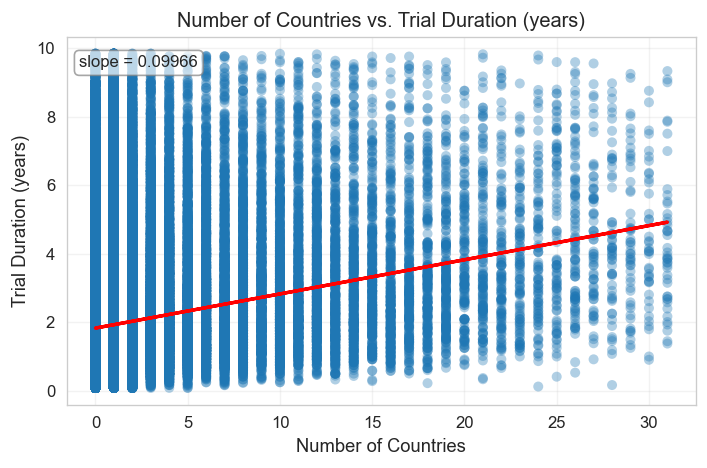

[02/19] Plotted numeric country_n
Saved: figures/site_n_vs_duration_years.jpg


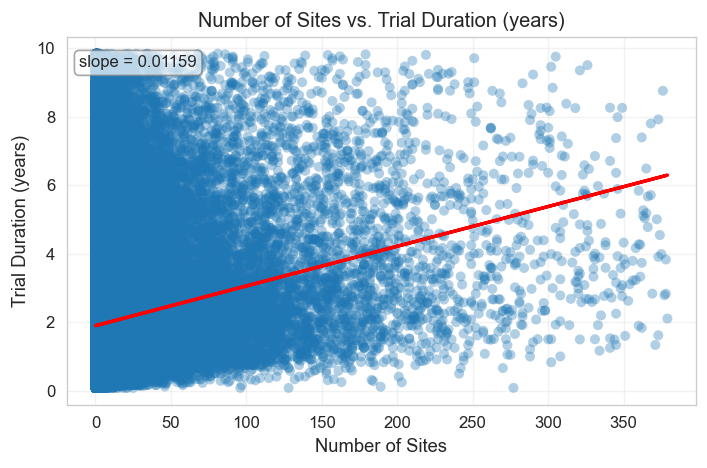

[03/19] Plotted numeric site_n
Saved: figures/assessments_n_vs_duration_years.jpg


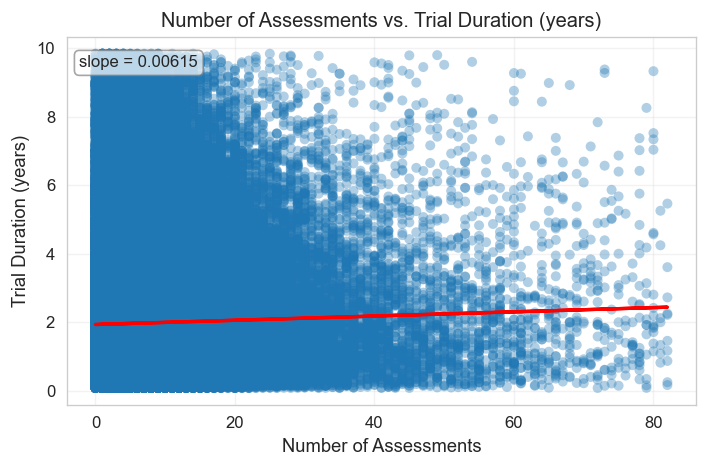

[04/19] Plotted numeric assessments_n
Saved: figures/primary_out_n_vs_duration_years.jpg


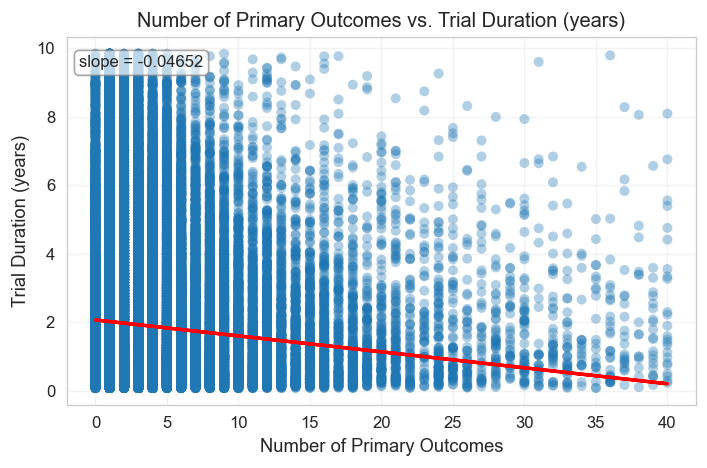

[05/19] Plotted numeric primary_out_n
Saved: figures/secondary_out_n_vs_duration_years.jpg


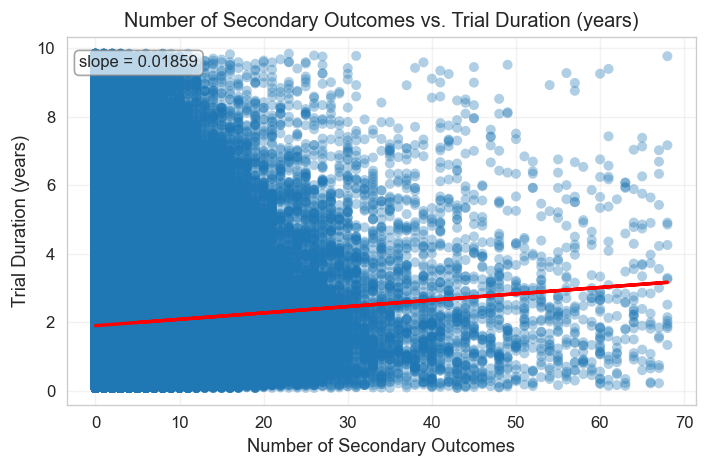

[06/19] Plotted numeric secondary_out_n
Saved: figures/other_out_n_vs_duration_years.jpg


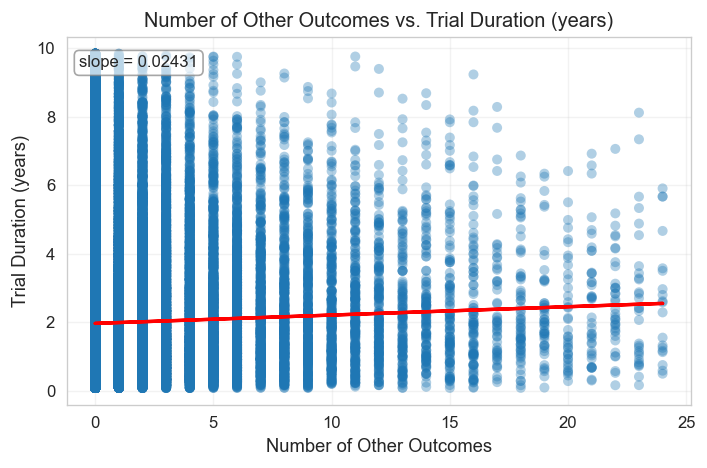

[07/19] Plotted numeric other_out_n
Saved: figures/start_date_vs_duration_years.jpg


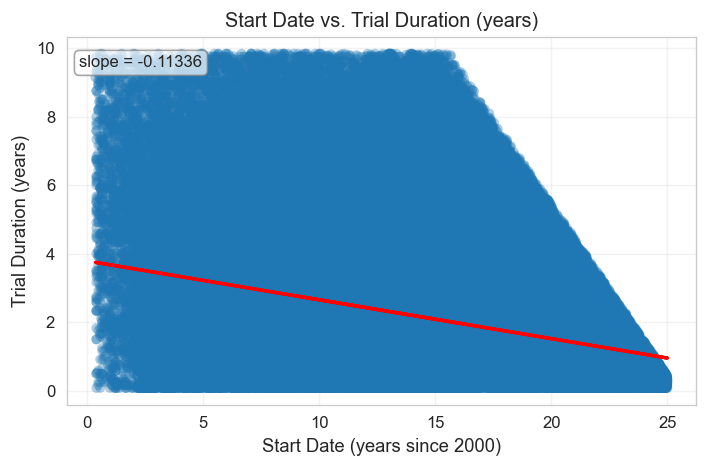

[08/19] Plotted numeric start_date
Saved: figures/patients_per_site_vs_duration_years.jpg


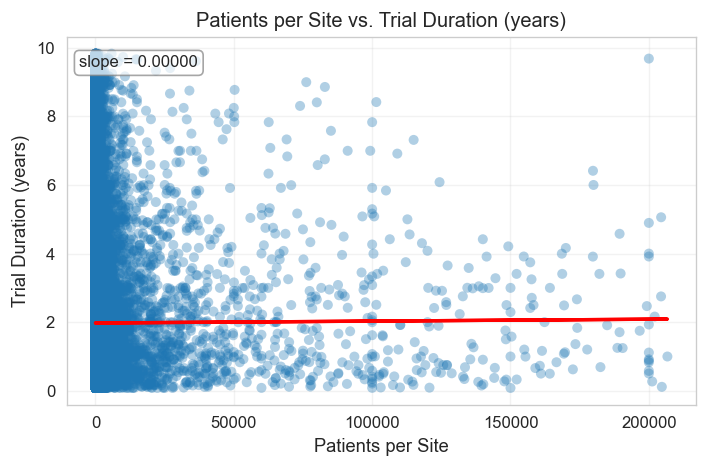

[09/19] Plotted numeric patients_per_site
Saved: figures/num_arms_vs_duration_years.jpg


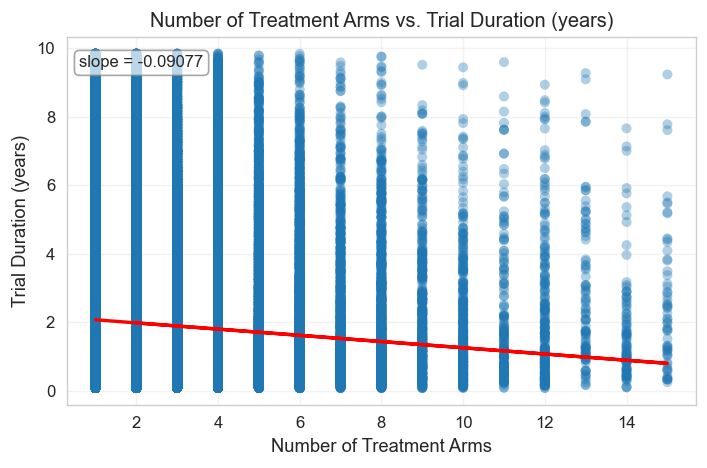

[10/19] Plotted numeric num_arms
Saved: figures/active_prob_vs_duration_years.jpg


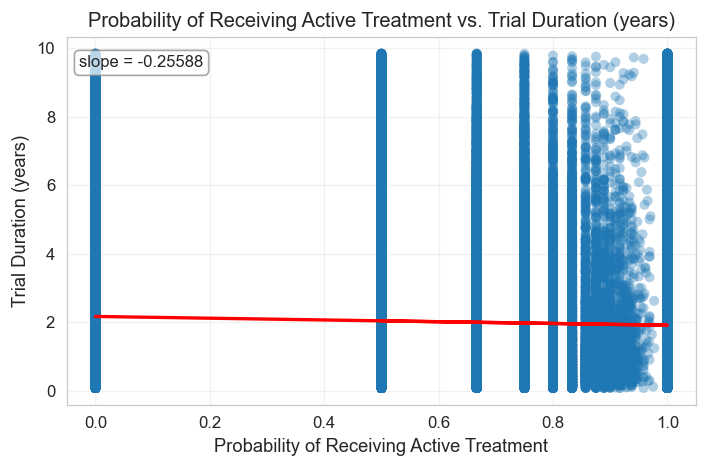

[11/19] Plotted numeric active_prob
Saved: figures/elig_crit_n_vs_duration_years.jpg


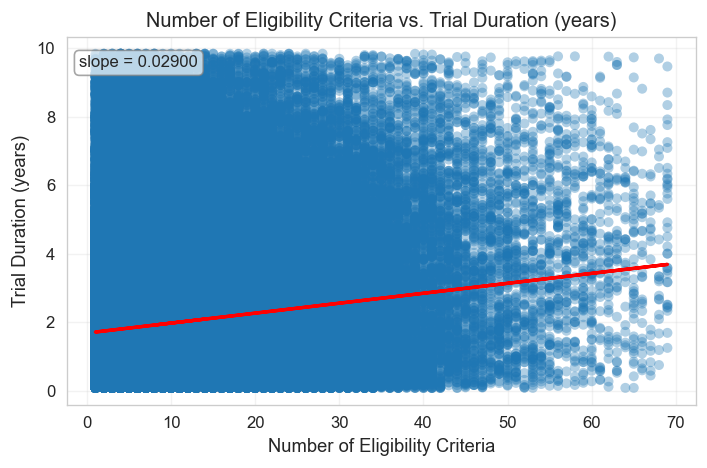

[12/19] Plotted numeric elig_crit_n
Saved: figures/age_min_vs_duration_years.jpg


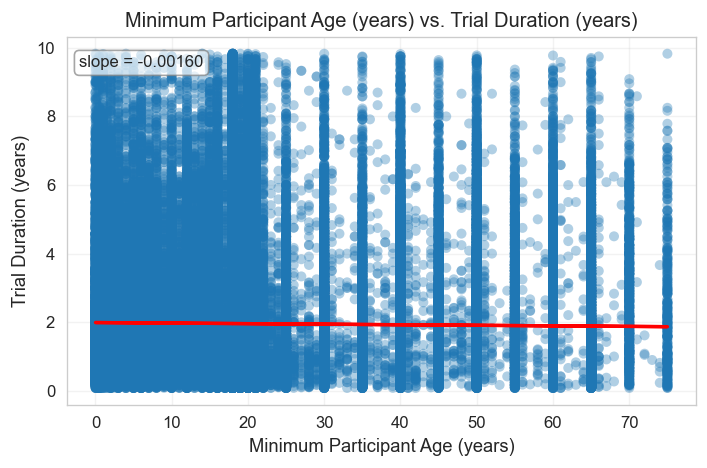

[13/19] Plotted numeric age_min
Saved: figures/age_max_vs_duration_years.jpg


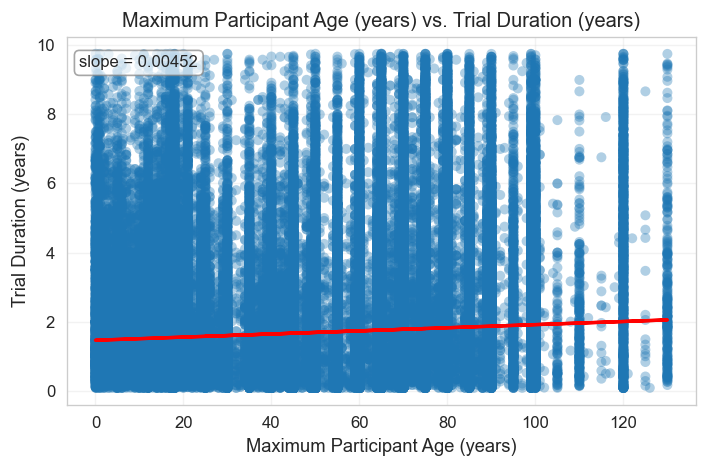

[14/19] Plotted numeric age_max
Saved: figures/age_range_vs_duration_years.jpg


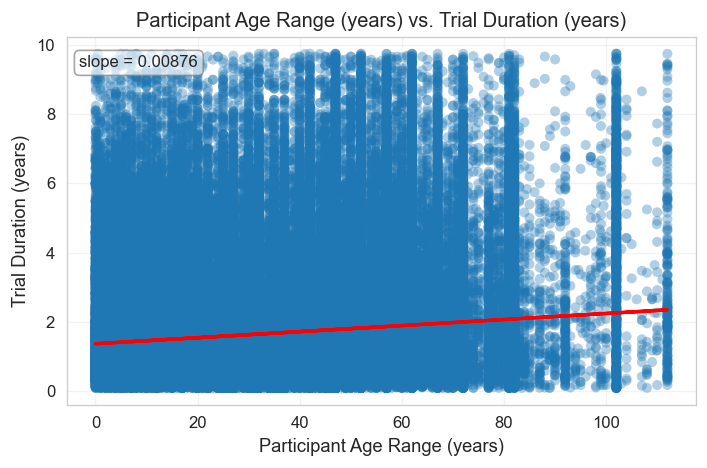

[15/19] Plotted numeric age_range
Saved: figures/freq_in_window_vs_duration_years.jpg


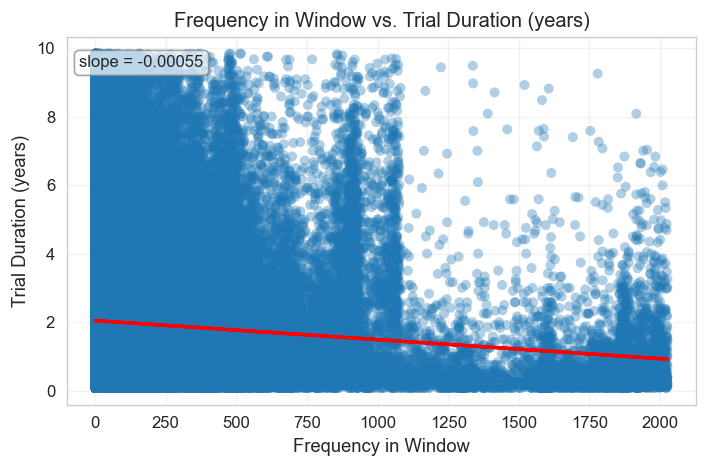

[16/19] Plotted numeric freq_in_window
Saved: figures/novelty_score_vs_duration_years.jpg


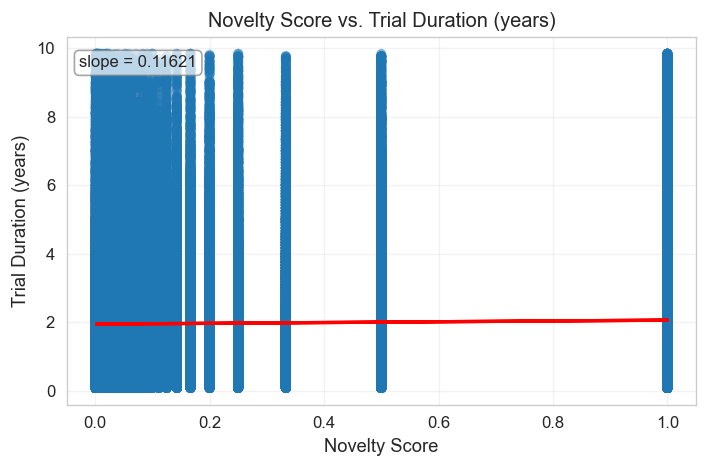

[17/19] Plotted numeric novelty_score
Saved: figures/complexity_score_100_vs_duration_years.jpg


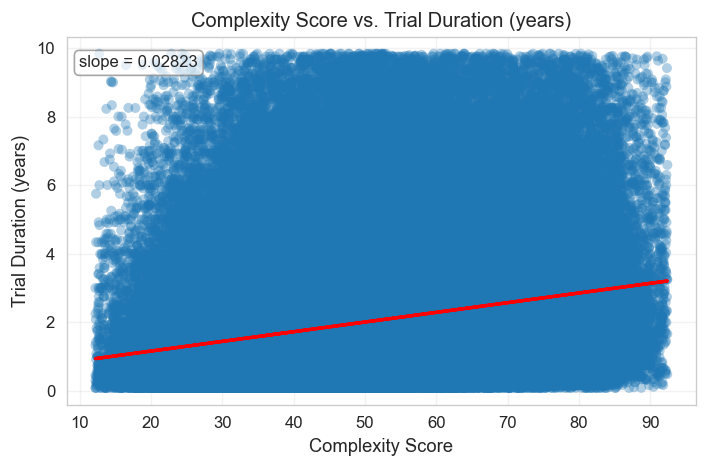

[18/19] Plotted numeric complexity_score_100
Saved: figures/attractiveness_score_100_vs_duration_years.jpg


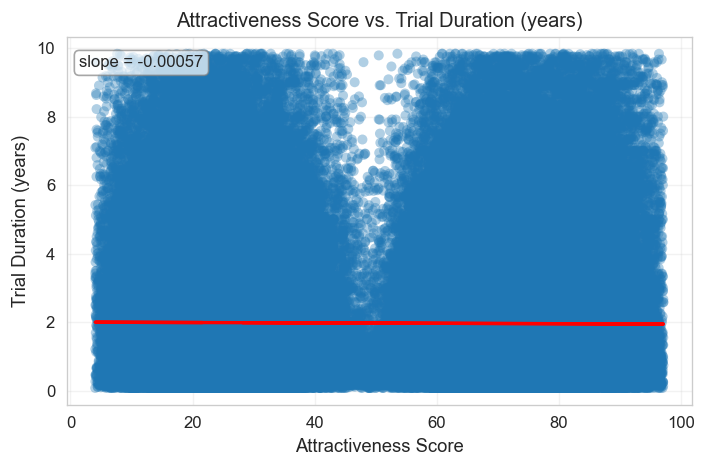

[19/19] Plotted numeric attractiveness_score_100
Saved: figures/phase_vs_duration_years.jpg


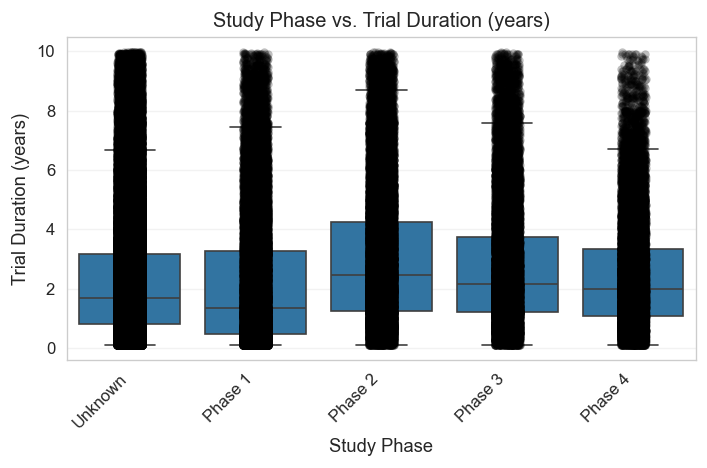

[01/18] Plotted cat phase
Saved: figures/sponsor_class_vs_duration_years.jpg


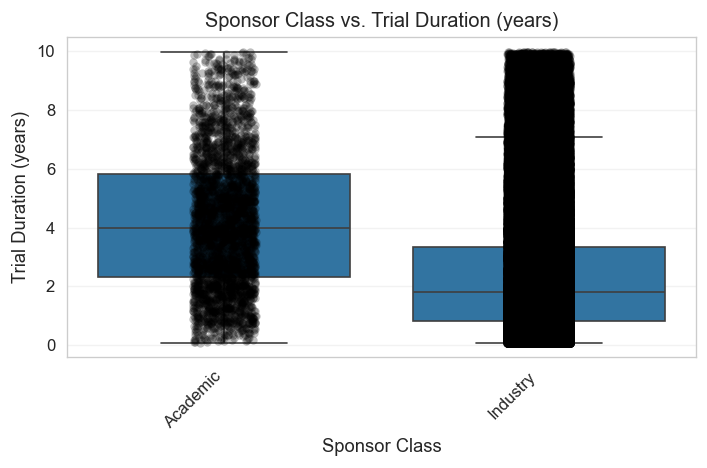

[02/18] Plotted cat sponsor_class
[03/18] Skip cat condition_top (46647 levels)
Saved: figures/therapeutic_area_vs_duration_years.jpg


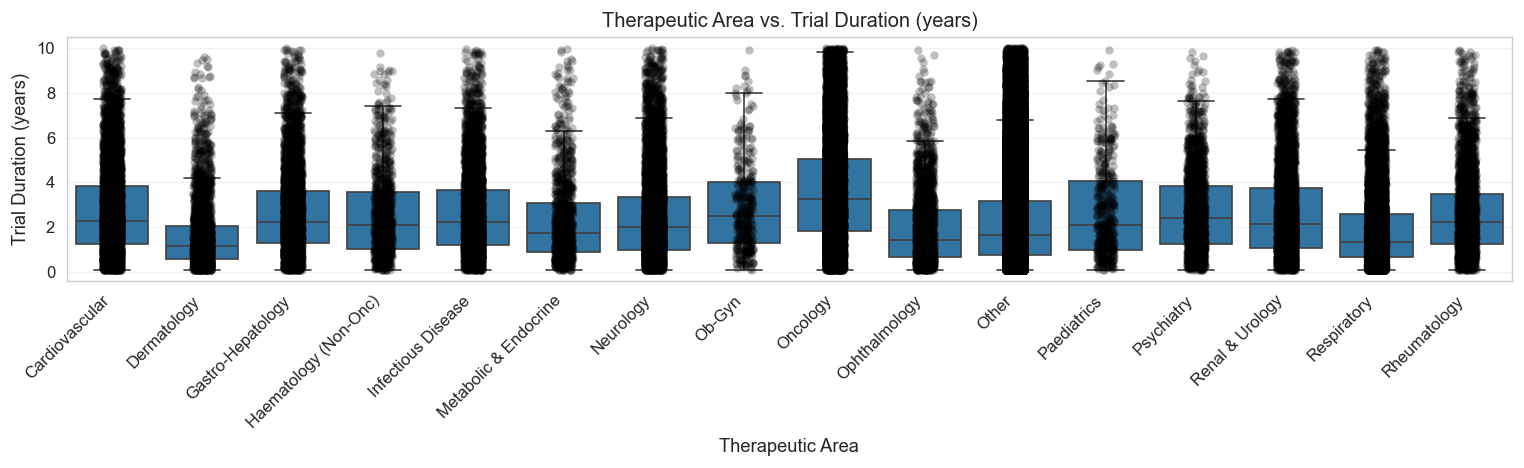

[04/18] Plotted cat therapeutic_area
Saved: figures/intervention_type_vs_duration_years.jpg


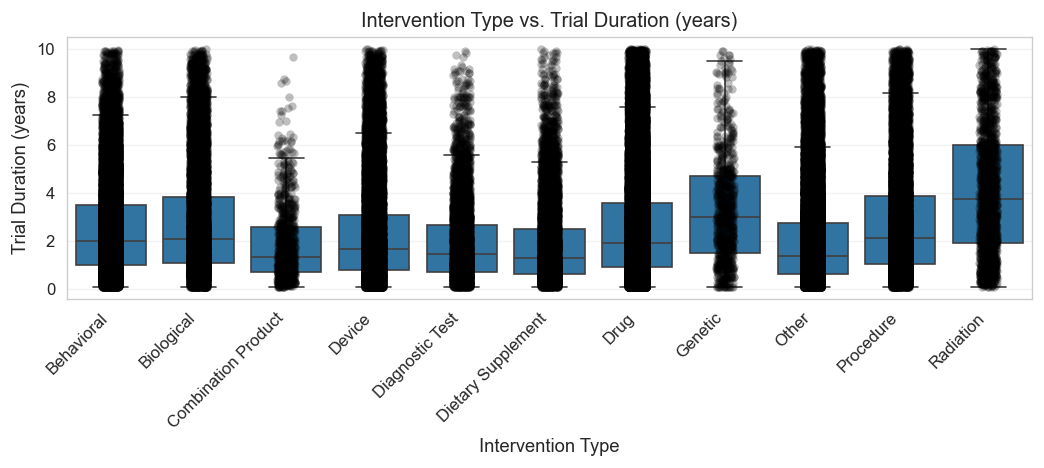

[05/18] Plotted cat intervention_type
Saved: figures/assessments_complexity_vs_duration_years.jpg


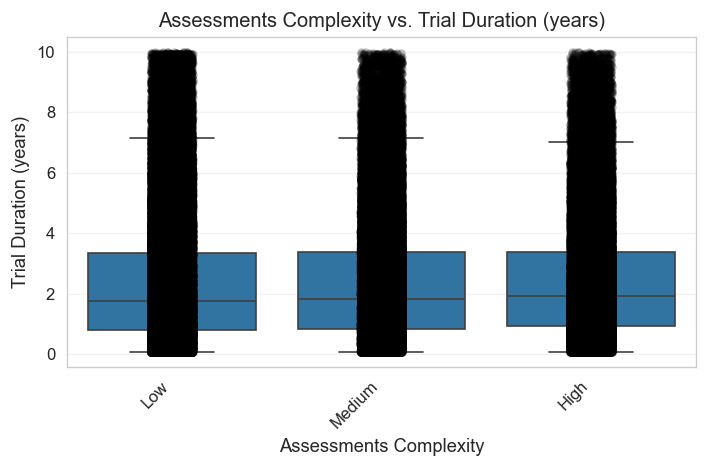

[06/18] Plotted cat assessments_complexity
Saved: figures/global_trial_vs_duration_years.jpg


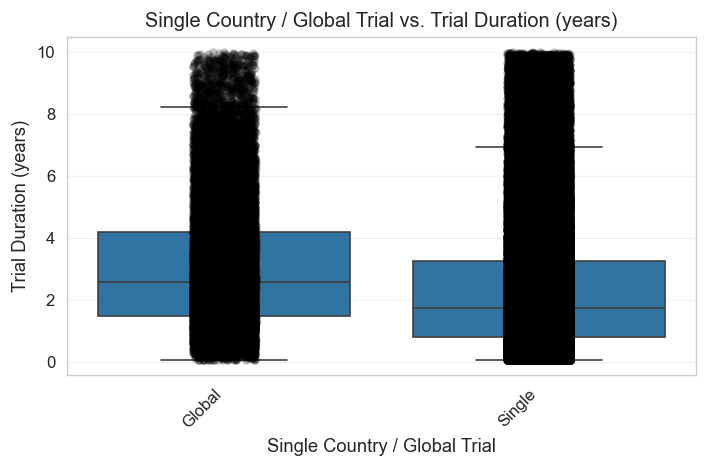

[07/18] Plotted cat global_trial
Saved: figures/masking_level_vs_duration_years.jpg


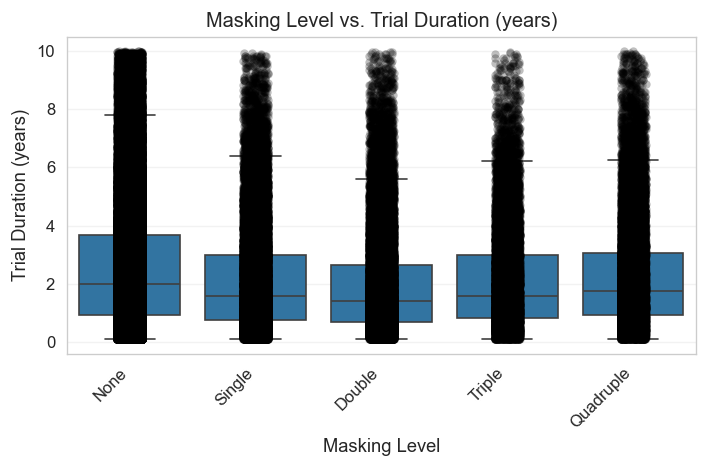

[08/18] Plotted cat masking_level
Saved: figures/population_class_vs_duration_years.jpg


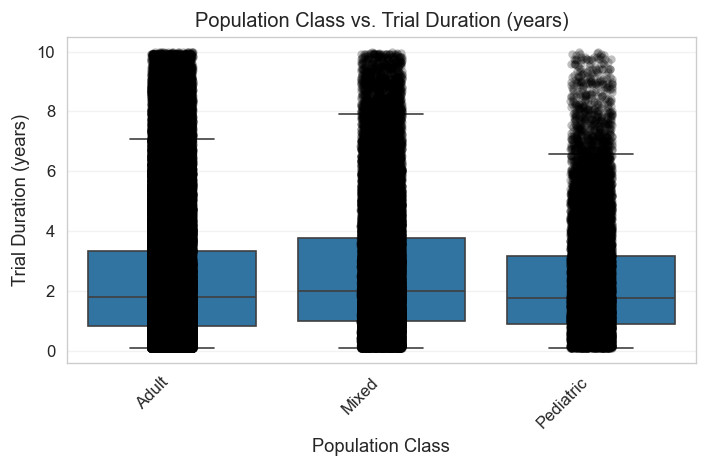

[09/18] Plotted cat population_class
Saved: figures/cohort_design_vs_duration_years.jpg


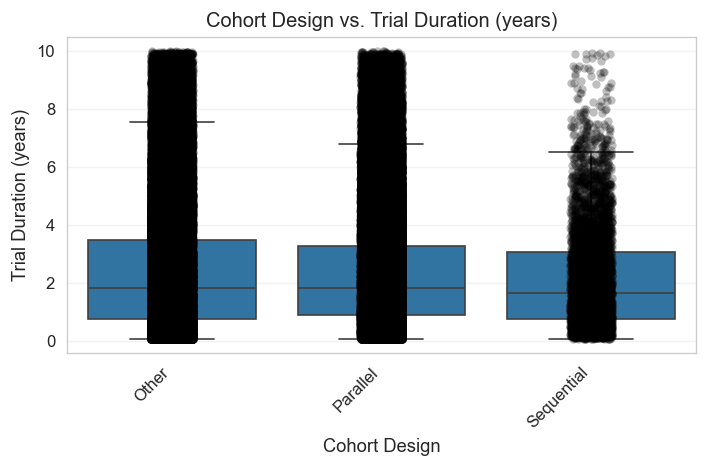

[10/18] Plotted cat cohort_design
Saved: figures/study_type_vs_duration_years.jpg


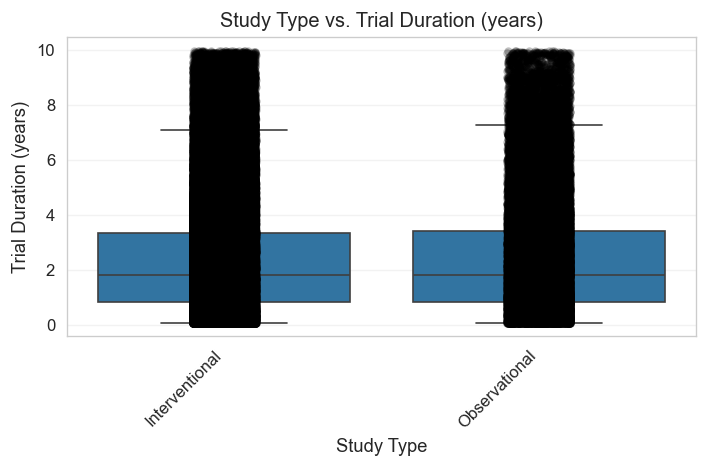

[11/18] Plotted cat study_type
Saved: figures/allocation_vs_duration_years.jpg


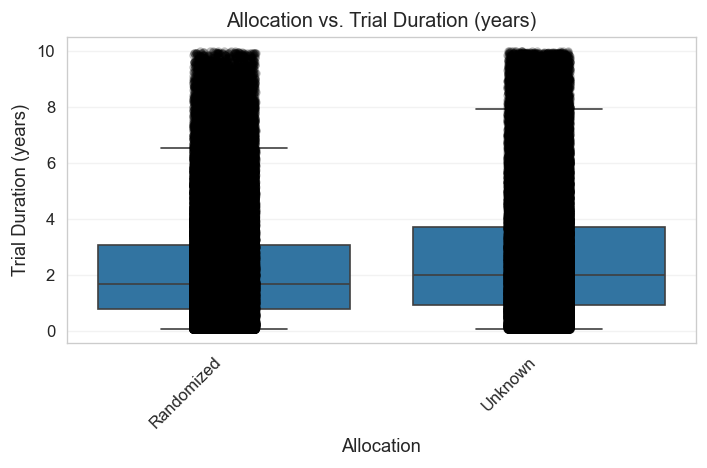

[12/18] Plotted cat allocation
Saved: figures/masking_flag_vs_duration_years.jpg


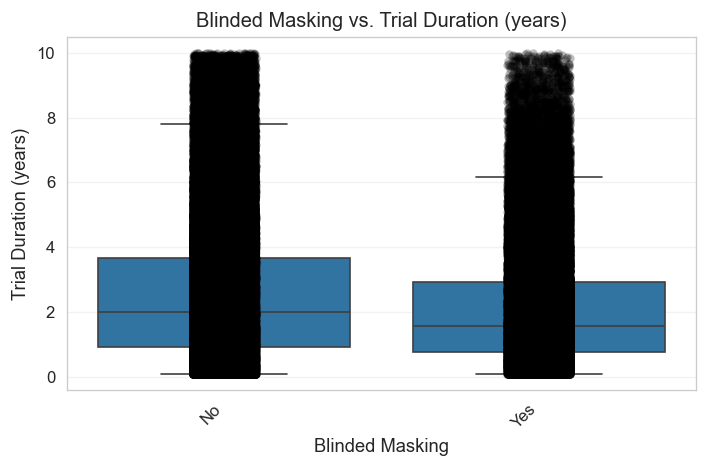

[13/18] Plotted cat masking_flag
Saved: figures/placebo_flag_vs_duration_years.jpg


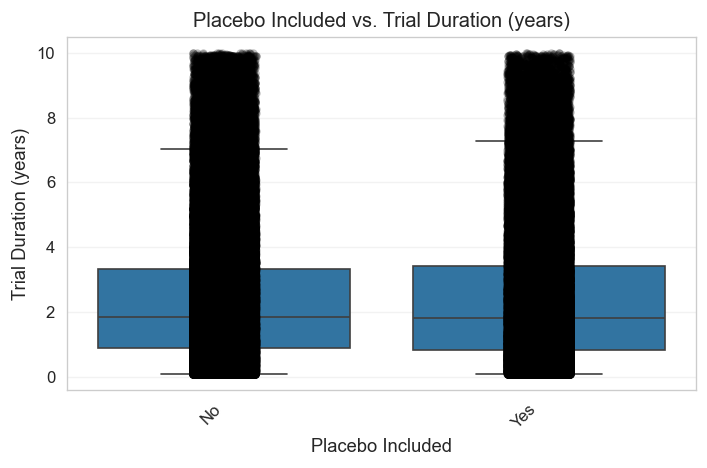

[14/18] Plotted cat placebo_flag
Saved: figures/safety_cuts_flag_vs_duration_years.jpg


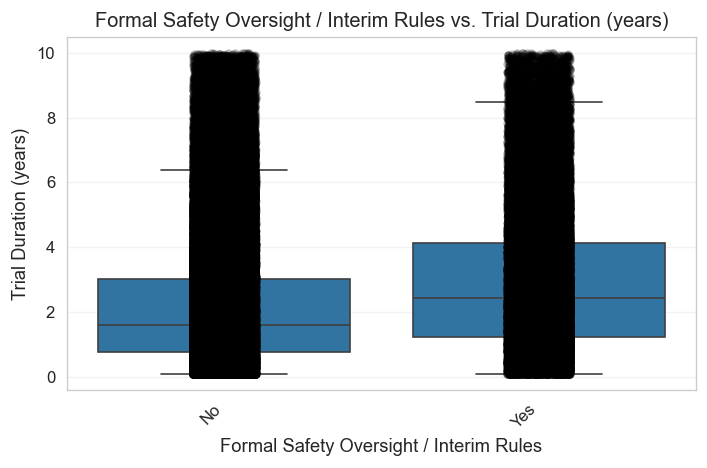

[15/18] Plotted cat safety_cuts_flag
Saved: figures/randomized_flag_vs_duration_years.jpg


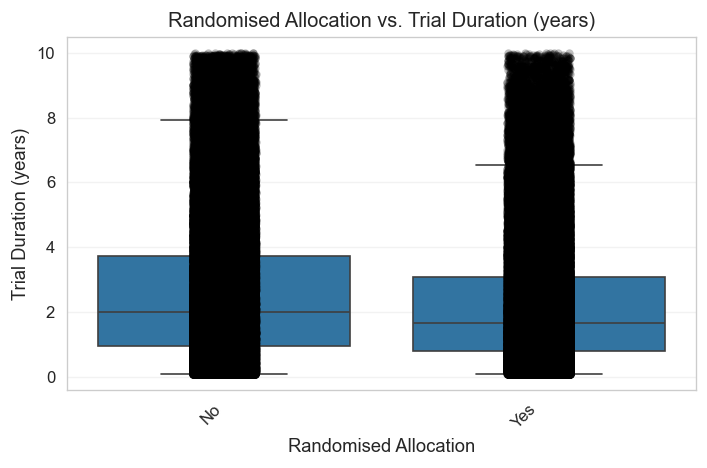

[16/18] Plotted cat randomized_flag
Saved: figures/fda_drug_flag_vs_duration_years.jpg


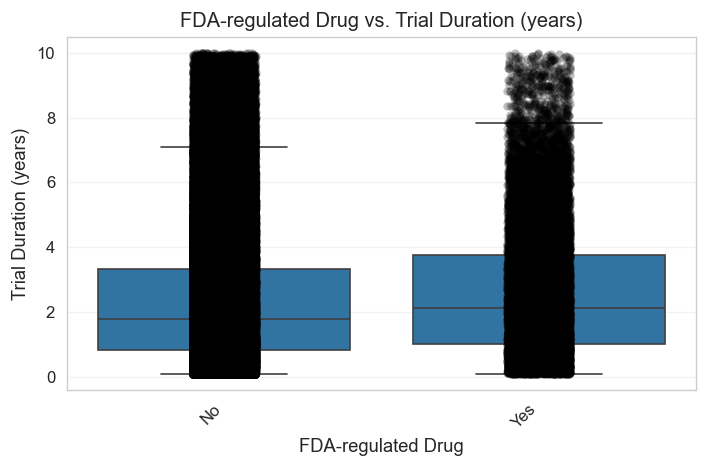

[17/18] Plotted cat fda_drug_flag
Saved: figures/fda_device_flag_vs_duration_years.jpg


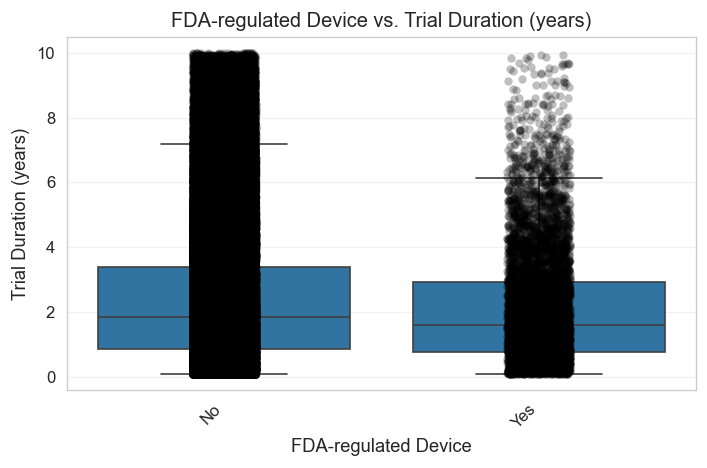

[18/18] Plotted cat fda_device_flag


In [38]:
from pathlib import Path
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import time
sns.set_style("whitegrid")
# Load
PARQUET = Path(
    "/Users/jonathanfung/Library/Mobile Documents/com~apple~CloudDocs/"
    "UCL MSc DSML/MSc Project/data/processed/features_v6.parquet"
)
df = pq.read_table(PARQUET).to_pandas()
# Compute duration_years
df["duration_years"] = df["duration_days"] / 365.25
target = "duration_years" # response variable
# Feature list
manual_numeric = [
    "# patients",
    "country_n",
    "site_n",
    "assessments_n",
    "primary_out_n",
    "secondary_out_n",
    "other_out_n",
    "start_date",
    "patients_per_site",
    "num_arms",
    "masking_flag",
    "placebo_flag",
    "active_prob",
    "elig_crit_n",
    "safety_cuts_flag",
    "age_min",
    "age_max",
    "age_range",
    "randomized_flag",
    "fda_drug_flag",
    "fda_device_flag",
    "freq_in_window",
    "novelty_score",
    "complexity_score_100",
    "attractiveness_score_100",
]
manual_categorical = [
    "phase",
    "sponsor_class",
    "condition_top",
    "therapeutic_area",
    "intervention_type",
    "assessments_complexity",
    "global_trial",
    "masking_level",
    "population_class",
    "cohort_design",
    "study_type",
    "allocation",
]
# Remove blank/duplicate names and keep only columns that actually exist
numeric_cols = [c for c in manual_numeric if c and c in df.columns]
categorical_cols = [c for c in manual_categorical if c and c in df.columns]
# Move flags to categorical
flags = [c for c in numeric_cols if "_flag" in c or c == "safety_cuts" or c == "placebo_flag" or c == "masking_flag"]
for f in flags[:]: # copy to avoid modification during iteration
    if f in numeric_cols:
        numeric_cols.remove(f)
    if f not in categorical_cols:
        categorical_cols.append(f)
    df[f] = df[f].map({0: "No", 1: "Yes"}).astype("category")
# Cast other categoricals to pandas 'category'
df[categorical_cols] = df[categorical_cols].apply(lambda s: s.astype("category"))
print(f"{len(numeric_cols)} numeric predictors : " + ", ".join(numeric_cols))
print(f"{len(categorical_cols)} categorical predictors: " + ", ".join(categorical_cols))
print()
# Display labels
DISPLAY_LABELS = {
    "duration_days": "Trial Duration (days)",
    "duration_years": "Trial Duration (years)",
    "start_year": "Start Year",
    "num_arms": "Number of Treatment Arms",
    "assessments_n": "Number of Assessments",
    "primary_out_n": "Number of Primary Outcomes",
    "secondary_out_n": "Number of Secondary Outcomes",
    "other_out_n": "Number of Other Outcomes",
    "elig_crit_n": "Number of Eligibility Criteria",
    "active_prob": "Probability of Receiving Active Treatment",
    "masking_flag": "Blinded Masking",
    "placebo_flag": "Placebo Included",
    "randomized_flag": "Randomised Allocation",
    "fda_drug_flag": "FDA-regulated Drug",
    "fda_device_flag": "FDA-regulated Device",
    "safety_cuts_flag": "Formal Safety Oversight / Interim Rules",
    "country_n": "Number of Countries",
    "site_n": "Number of Sites",
    "# patients": "Number of Patients",
    "patients_per_site": "Patients per Site",
    "age_min": "Minimum Participant Age (years)",
    "age_max": "Maximum Participant Age (years)",
    "age_range": "Participant Age Range (years)",
    "phase": "Study Phase",
    "sponsor_class": "Sponsor Class",
    "intervention_type": "Intervention Type",
    "masking_level": "Masking Level",
    "condition_top": "Top Condition",
    "study_type": "Study Type",
    "allocation": "Allocation",
    "cohort_design": "Cohort Design",
    "therapeutic_area": "Therapeutic Area",
    "assessments_complexity": "Assessments Complexity",
    "global_trial": "Single Country / Global Trial",
    "population_class": "Population Class",
    "start_date": "Start Date",
    "freq_in_window": "Frequency in Window",
    "novelty_score": "Novelty Score",
    "complexity_score_100": "Complexity Score",
    "attractiveness_score_100": "Attractiveness Score",
    # Add any other columns as needed
}
def pretty(col):
    return DISPLAY_LABELS.get(col, col)
# Define category orders
category_orders = {
    "phase": ["Unknown", "Phase 1", "Phase 2", "Phase 3", "Phase 4"],
    "assessments_complexity": ["Low", "Medium", "High"],
    "masking_level": ["None", "Single", "Double", "Triple", "Quadruple"],
}
# Ensure consistent No/Yes order for flags
for col in categorical_cols:
    if set(df[col].unique()) == {"No", "Yes"}:
        df[col] = pd.Categorical(df[col], categories=["No", "Yes"], ordered=True)

# Create output directory
output_dir = Path("figures")
output_dir.mkdir(exist_ok=True)

# Numeric features: scatter + trendline
from sklearn.linear_model import HuberRegressor
for i, col in enumerate(numeric_cols, 1):
    if col == target:
        continue
    subset = df[[col, target]].dropna()
    if len(subset) < 2 or subset[col].nunique() < 2:
        print(f"[{i:02}/{len(numeric_cols)}] Skip numeric {col} (insufficient data)")
        continue
    # Handle datetime columns only for start_date and complete_date
    x = subset[col]
    if np.issubdtype(x.dtype, np.datetime64) and col in ["start_date"]:
        x = (x - pd.Timestamp("2000-01-01")).dt.total_seconds() / (365.25 * 24 * 3600)
    elif np.issubdtype(x.dtype, np.datetime64):
        x = x.view("int64") / 24 / 3600 / 1e9 # Default conversion for other datetime columns
    y = subset[target]
 
    # Drop rows outside the 0.001–0.999 quantile range (no clipping)
    lo_x, hi_x = x.quantile([0.001, 0.999])
    lo_y, hi_y = y.quantile([0.001, 0.999])
    mask = (x.between(lo_x, hi_x)) & (y.between(lo_y, hi_y))
    subset_trimmed = pd.DataFrame({'x': x[mask], 'y': y[mask]})
    if len(subset_trimmed) < 2 or subset_trimmed['x'].nunique() < 2:
        print(f"[{i:02}/{len(numeric_cols)}] Skip numeric {col} (insufficient data after trimming)")
        continue
    # Regression model: HuberRegressor
    model = HuberRegressor(epsilon=1.35)
    model.fit(subset_trimmed[['x']], subset_trimmed['y'])
    y_pred = model.predict(subset_trimmed[['x']])
    slope = model.coef_[0] # Extract the slope from the model
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=subset_trimmed['x'], y=subset_trimmed['y'], alpha=0.35, edgecolor="none")
    plt.plot(subset_trimmed['x'], y_pred, color='red', linewidth=2)
    plt.text(
        0.02, 0.95, f"slope = {slope:.5f}",
        transform=plt.gca().transAxes, ha="left", va="top",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
    )
    plt.title(f"{pretty(col)} vs. {pretty(target)}")
    if col in ["start_date"]:
        plt.xlabel(f"{pretty(col)} (years since 2000)")
    else:
        plt.xlabel(pretty(col))
    plt.ylabel(pretty(target))
    plt.tight_layout()
    save_path = output_dir / f"{col}_vs_{target}.jpg"
    plt.savefig(save_path, dpi=200)
    print(f"Saved: {save_path}")
    plt.show()
    plt.close()
    print(f"[{i:02}/{len(numeric_cols)}] Plotted numeric {col}")
    time.sleep(0.05)
# Categorical features -> box + strip
for i, col in enumerate(categorical_cols, 1):
    subset = df[[col, target]].dropna()
    n_levels = subset[col].nunique(dropna=True)
    if len(subset) == 0 or n_levels == 0:
        print(f"[{i:02}/{len(categorical_cols)}] Skip cat {col} (no data)")
        continue
    if n_levels > 50:
        print(f"[{i:02}/{len(categorical_cols)}] Skip cat {col} ({n_levels} levels)")
        continue
    # Clean category labels: remove underscores, title case
    subset[col] = subset[col].astype(str).str.replace('_', ' ').str.title()
    # Set custom order if defined
    if col in category_orders:
        order = category_orders[col]
    else:
        unique = subset[col].unique()
        if set(unique) == {'No', 'Yes'}:
            order = ['No', 'Yes']
        else:
            order = sorted(unique) # Default to sorted
    # Convert to ordered categorical
    subset[col] = pd.Categorical(subset[col], categories=order, ordered=True)
    plt.figure(figsize=(max(6, n_levels * 0.8), 4))
    sns.boxplot(data=subset, x=col, y=target, showfliers=False, linewidth=1)
    sns.stripplot(data=subset, x=col, y=target, alpha=0.25,
                  color="black", jitter=True)
    plt.title(f"{pretty(col)} vs. {pretty(target)}")
    plt.xlabel(pretty(col))
    plt.ylabel(pretty(target))
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    save_path = output_dir / f"{col}_vs_{target}.jpg"
    plt.savefig(save_path, dpi=200)
    print(f"Saved: {save_path}")
    plt.show()
    plt.close()
    print(f"[{i:02}/{len(categorical_cols)}] Plotted cat {col}")
    time.sleep(0.05)

In [37]:
from pathlib import Path
import pandas as pd
import pyarrow.parquet as pq

# Path to the parquet file
PARQUET = Path(
    "/Users/jonathanfung/Library/Mobile Documents/com~apple~CloudDocs/"
    "UCL MSc DSML/MSc Project/data/processed/features_v6.parquet"
)

# Load the parquet file
df = pq.read_table(PARQUET).to_pandas()

# Display all column names
print("All columns:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Check for columns related to 'safety' or 'cuts'
safety_cols = [col for col in df.columns if 'safety' in col.lower() or 'cut' in col.lower()]
print("Columns containing 'safety' or 'cut':")
print(safety_cols)
print("\n" + "="*50 + "\n")

# If safety_cuts exists, show its unique values and data type
if 'safety_cuts' in df.columns:
    print("safety_cuts info:")
    print(f"Data type: {df['safety_cuts'].dtype}")
    print(f"Unique values: {df['safety_cuts'].unique()}")
    print(f"Value counts:\n{df['safety_cuts'].value_counts()}")
else:
    print("safety_cuts column not found.")

# Show first few rows of safety-related columns if any
if safety_cols:
    print("\nFirst 5 rows of safety-related columns:")
    print(df[safety_cols].head())

All columns:
['indication/disease area', 'rare, non-rare (established disease area and clear diagnosis criteria)', 'mode of administration (ex. NBE, NCE, iv vs pill)', 'disease modifying or treating symptoms', 'population - adults vs peds', 'phase', '# patients', 'primary_outcomes', 'secondary_outcomes', 'other_outcomes', 'cohorts (sequential or parallel)', 'Eligibility Criteria: The stringency and number of eligibility criteria for participants', 'placebo included', 'safety cuts, DMCs', '# countries', '# sites', 'Study Start Date', 'Primary Completion Date', 'Study Full Completion Date', 'mask level', 'sponsorship type', 'study type', 'minimum age', 'maximum age', 'Allocation (Randomised / Non-randomised)', 'FDA-regulated drug', 'FDA-regulated device', 'Primary Completion Type', 'Overall status', 'Number of arms', 'nct_id', 'Brief Summary', 'Study First Submit Date', 'site_n', 'country_n', 'start_date', 'complete_date', 'duration_days', 'start_year', 'sponsor_class', 'condition_top', 